In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('voice.csv')

print(data.head())

X = data.drop(columns='label') 
y = data['label']  

le = LabelEncoder()
y = le.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


selector = SelectKBest(chi2, k=10)  


X_new = selector.fit_transform(X_train, y_train)

# Step 4: Apply SelectKBest (Chi-Square) to select top 10 features
# Ensure that all values in X are non-negative for chi2 to work correctly
selected_features = X.columns[selector.get_support()]  # Get feature names
chi2_scores = selector.scores_[selector.get_support()]  # Get Chi-Square scores

selected_feature_table = pd.DataFrame({'Feature': selected_features, 'Chi2 Score': chi2_scores})

print("Selected Features and Chi-Square Scores:")
print(selected_feature_table)

selected_feature_table.to_csv('selected_features.csv', index=False)

X_train_selected = X_train[selected_features]  # Train data with selected features
X_test_selected = X_test[selected_features]    # Test data with selected features



   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

In [8]:

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('voice.csv')

# Preview the first few rows of the dataset
print(data.head())

# Step 1: Split the dataset into features (X) and labels (y)
X = data.drop(columns='label')  # Drop the 'label' column as features
y = data['label']  # Target variable

# Step 2: Convert the target variable (label) to numeric if it's categorical (male/female)
le = LabelEncoder()  # Initialize the LabelEncoder
y = le.fit_transform(y)  # Convert the labels to numeric (0 or 1)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Apply Recursive Feature Elimination (RFE)
# Initialize the classifier to rank feature importance (RandomForestClassifier in this case)
model = RandomForestClassifier(random_state=42)

# Initialize RFE to select top 10 features
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit the RFE model on the training data
rfe = rfe.fit(X_train, y_train)

# Step 5: Get the names of the selected features
selected_features_rfe = X.columns[rfe.support_]  # Get the selected feature names
rfe_ranking = rfe.ranking_[rfe.support_]  # Get the ranking for the selected features

# Create a DataFrame to display the selected features and their rankings
selected_feature_table_rfe = pd.DataFrame({'Feature': selected_features_rfe, 'Ranking': rfe_ranking})

# Display the selected features and their rankings
print("Selected Features (RFE) and Their Rankings:")
print(selected_feature_table_rfe)

# Step 6: Save the selected features to a CSV file for future use
selected_feature_table_rfe.to_csv('selected_features_rfe.csv', index=False)

# Optional: Use the selected features for further modeling
X_train_selected_rfe = X_train[selected_features_rfe]  # Train data with selected features
X_test_selected_rfe = X_test[selected_features_rfe]    # Test data with selected features

# Now, X_train_selected_rfe and X_test_selected_rfe contain only the selected top 10 features.


   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('voice.csv')

# Preview the first few rows of the dataset
print(data.head())

# Step 1: Split the dataset into features (X) and labels (y)
X = data.drop(columns='label')  # Drop the 'label' column as features
y = data['label']  # Target variable

# Step 2: Convert the target variable (label) to numeric if it's categorical (male/female)
le = LabelEncoder()  # Initialize the LabelEncoder
y = le.fit_transform(y)  # Convert the labels to numeric (0 or 1)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Feature scaling (important for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply Lasso for feature selection
# Initialize Lasso model (L1 regularization)
lasso = Lasso(alpha=0.01, random_state=42)

# Fit the Lasso model to the training data
lasso.fit(X_train_scaled, y_train)

# Step 6: Get the names of the selected features based on non-zero coefficients
# Lasso sets some coefficients to zero, meaning these features are less important
selected_features_lasso = X.columns[lasso.coef_ != 0]  # Get features where coefficients are non-zero
lasso_coefficients = lasso.coef_[lasso.coef_ != 0]  # Get the non-zero coefficients

# Create a DataFrame to display the selected features and their Lasso coefficients
selected_feature_table_lasso = pd.DataFrame({'Feature': selected_features_lasso, 'Lasso Coefficients': lasso_coefficients})

# Display the selected features and their Lasso coefficients
print("Selected Features (Lasso) and Their Coefficients:")
print(selected_feature_table_lasso)

# Step 7: Save the selected features to a CSV file for future use
selected_feature_table_lasso.to_csv('selected_features_lasso.csv', index=False)

# Optional: Use the selected features for further modeling
X_train_selected_lasso = X_train[selected_features_lasso]  # Train data with selected features
X_test_selected_lasso = X_test[selected_features_lasso]    # Test data with selected features

# Now, X_train_selected_lasso and X_test_selected_lasso contain only the selected features.


   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

Top 3 features selected by Lasso:  Index(['meanfun', 'IQR', 'Q75'], dtype='object')
Accuracy of KNN on top 3 features:  0.85068349106204
F1 Score of KNN on top 3 features:  0.8610567514677103
ROC AUC Score of KNN on top 3 features:  0.9144705339883306


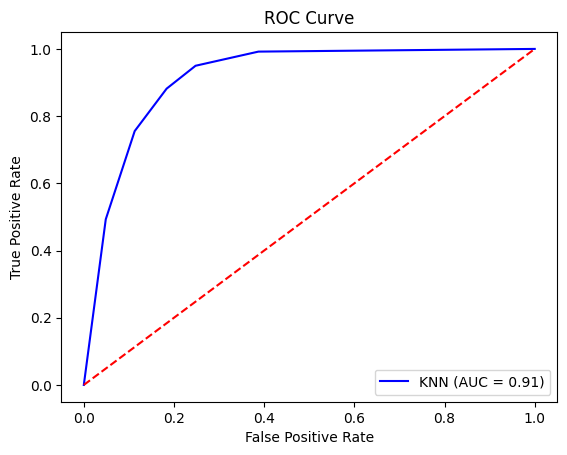

              precision    recall  f1-score   support

      female       0.86      0.82      0.84       452
        male       0.84      0.88      0.86       499

    accuracy                           0.85       951
   macro avg       0.85      0.85      0.85       951
weighted avg       0.85      0.85      0.85       951



In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('voice.csv')

# Step 1: Split the dataset into features (X) and labels (y)
X = data.drop(columns='label')  # Drop the 'label' column as features
y = data['label']  # Target variable

# Step 2: Convert the target variable (label) to numeric (male/female to 0/1)
le = LabelEncoder()
y = le.fit_transform(y)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Feature scaling (important for Lasso and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply Lasso for feature selection to select top 3 features
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Get the top 3 features based on the largest coefficients (non-zero coefficients)
# Sort by absolute value of coefficients and select top 3
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
top_3_features = lasso_coef.abs().sort_values(ascending=False).head(3).index

print("Top 3 features selected by Lasso: ", top_3_features)

# Step 6: Select the top 3 features from the training and testing sets
X_train_top3 = X_train_scaled[:, lasso_coef.abs().sort_values(ascending=False).head(3).index.get_indexer(X.columns)]
X_test_top3 = X_test_scaled[:, lasso_coef.abs().sort_values(ascending=False).head(3).index.get_indexer(X.columns)]

# Step 7: Apply KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_top3, y_train)

# Step 8: Predict the labels for the test set
y_pred = knn.predict(X_test_top3)
y_pred_proba = knn.predict_proba(X_test_top3)[:, 1]  # Predicted probabilities for ROC AUC

# Step 9: Evaluate the KNN model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNN on top 3 features: ", accuracy)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score of KNN on top 3 features: ", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score of KNN on top 3 features: ", roc_auc)

# Step 10: ROC Curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))


Top 3 features selected by Lasso:  Index(['meanfun', 'IQR', 'Q75'], dtype='object')
Accuracy of Random Forest on top 3 features:  0.8601472134595163
F1 Score of Random Forest on top 3 features:  0.8684470820969338
ROC AUC Score of Random Forest on top 3 features:  0.9209148385266107


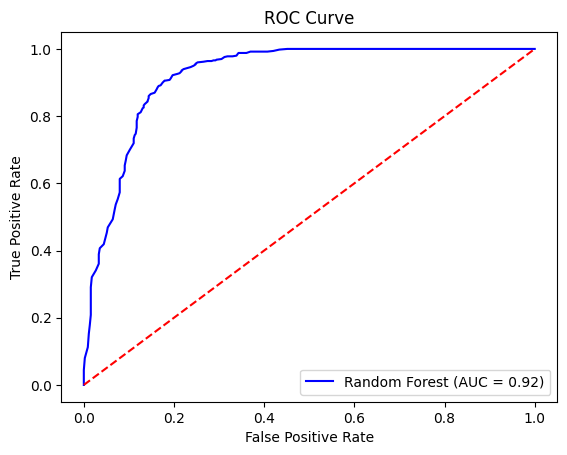

              precision    recall  f1-score   support

      female       0.86      0.84      0.85       452
        male       0.86      0.88      0.87       499

    accuracy                           0.86       951
   macro avg       0.86      0.86      0.86       951
weighted avg       0.86      0.86      0.86       951



In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('voice.csv')

# Step 1: Split the dataset into features (X) and labels (y)
X = data.drop(columns='label')  # Drop the 'label' column as features
y = data['label']  # Target variable

# Step 2: Convert the target variable (label) to numeric (male/female to 0/1)
le = LabelEncoder()
y = le.fit_transform(y)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Feature scaling (important for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply Lasso for feature selection to select top 3 features
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Get the top 3 features based on the largest coefficients (non-zero coefficients)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
top_3_features = lasso_coef.abs().sort_values(ascending=False).head(3).index

print("Top 3 features selected by Lasso: ", top_3_features)

# Step 6: Select the top 3 features from the training and testing sets
X_train_top3 = X_train_scaled[:, lasso_coef.abs().sort_values(ascending=False).head(3).index.get_indexer(X.columns)]
X_test_top3 = X_test_scaled[:, lasso_coef.abs().sort_values(ascending=False).head(3).index.get_indexer(X.columns)]

# Step 7: Apply Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_top3, y_train)

# Step 8: Predict the labels for the test set
y_pred = rf.predict(X_test_top3)
y_pred_proba = rf.predict_proba(X_test_top3)[:, 1]  # Predicted probabilities for ROC AUC

# Step 9: Evaluate the Random Forest model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest on top 3 features: ", accuracy)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score of Random Forest on top 3 features: ", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score of Random Forest on top 3 features: ", roc_auc)

# Step 10: ROC Curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))


Top 3 features selected by Lasso:  Index(['meanfun', 'IQR', 'Q75'], dtype='object')
Accuracy of Naïve Bayes on top 3 features:  0.6035751840168244
F1 Score of Naïve Bayes on top 3 features:  0.5058977719528178
ROC AUC Score of Naïve Bayes on top 3 features:  0.7845070672318087


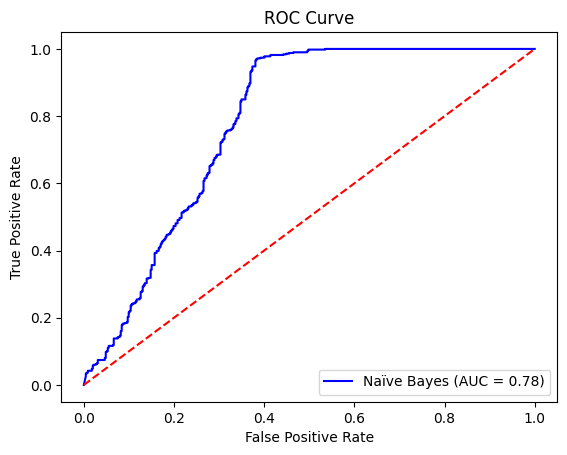

              precision    recall  f1-score   support

      female       0.55      0.84      0.67       452
        male       0.73      0.39      0.51       499

    accuracy                           0.60       951
   macro avg       0.64      0.61      0.59       951
weighted avg       0.65      0.60      0.58       951



In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('voice.csv')

# Step 1: Split the dataset into features (X) and labels (y)
X = data.drop(columns='label')  # Drop the 'label' column as features
y = data['label']  # Target variable

# Step 2: Convert the target variable (label) to numeric (male/female to 0/1)
le = LabelEncoder()
y = le.fit_transform(y)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Feature scaling (important for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply Lasso for feature selection to select top 3 features
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Get the top 3 features based on the largest coefficients (non-zero coefficients)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
top_3_features = lasso_coef.abs().sort_values(ascending=False).head(3).index

print("Top 3 features selected by Lasso: ", top_3_features)

# Step 6: Select the top 3 features from the training and testing sets
X_train_top3 = X_train_scaled[:, lasso_coef.abs().sort_values(ascending=False).head(3).index.get_indexer(X.columns)]
X_test_top3 = X_test_scaled[:, lasso_coef.abs().sort_values(ascending=False).head(3).index.get_indexer(X.columns)]

# Step 7: Apply Naïve Bayes classifier
nb = GaussianNB()
nb.fit(X_train_top3, y_train)

# Step 8: Predict the labels for the test set
y_pred = nb.predict(X_test_top3)
y_pred_proba = nb.predict_proba(X_test_top3)[:, 1]  # Predicted probabilities for ROC AUC

# Step 9: Evaluate the Naïve Bayes model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Naïve Bayes on top 3 features: ", accuracy)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score of Naïve Bayes on top 3 features: ", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score of Naïve Bayes on top 3 features: ", roc_auc)

# Step 10: ROC Curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'Naïve Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))


Top 3 features selected by Lasso:  Index(['meanfun', 'IQR', 'Q75'], dtype='object')
Accuracy of Decision Tree on top 3 features:  0.825446898002103
F1 Score of Decision Tree on top 3 features:  0.8302658486707567
ROC AUC Score of Decision Tree on top 3 features:  0.8260614148651286


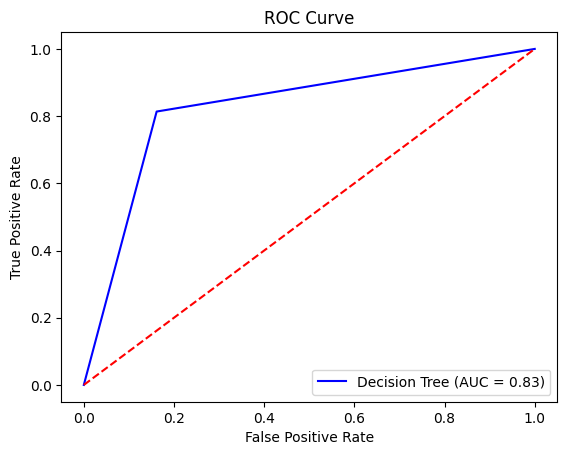

              precision    recall  f1-score   support

      female       0.80      0.84      0.82       452
        male       0.85      0.81      0.83       499

    accuracy                           0.83       951
   macro avg       0.83      0.83      0.83       951
weighted avg       0.83      0.83      0.83       951



In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('voice.csv')

# Step 1: Split the dataset into features (X) and labels (y)
X = data.drop(columns='label')  # Drop the 'label' column as features
y = data['label']  # Target variable

# Step 2: Convert the target variable (label) to numeric (male/female to 0/1)
le = LabelEncoder()
y = le.fit_transform(y)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Feature scaling (important for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply Lasso for feature selection to select top 3 features
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Get the top 3 features based on the largest coefficients (non-zero coefficients)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
top_3_features = lasso_coef.abs().sort_values(ascending=False).head(3).index

print("Top 3 features selected by Lasso: ", top_3_features)

# Step 6: Select the top 3 features from the training and testing sets
X_train_top3 = X_train_scaled[:, lasso_coef.abs().sort_values(ascending=False).head(3).index.get_indexer(X.columns)]
X_test_top3 = X_test_scaled[:, lasso_coef.abs().sort_values(ascending=False).head(3).index.get_indexer(X.columns)]

# Step 7: Apply Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_top3, y_train)

# Step 8: Predict the labels for the test set
y_pred = dt.predict(X_test_top3)
y_pred_proba = dt.predict_proba(X_test_top3)[:, 1]  # Predicted probabilities for ROC AUC

# Step 9: Evaluate the Decision Tree model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree on top 3 features: ", accuracy)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score of Decision Tree on top 3 features: ", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score of Decision Tree on top 3 features: ", roc_auc)

# Step 10: ROC Curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))


Top 3 features selected by Lasso:  Index(['meanfun', 'IQR', 'Q75'], dtype='object')
Accuracy of SVM on top 3 features:  0.832807570977918
F1 Score of SVM on top 3 features:  0.8529139685476411
ROC AUC Score of SVM on top 3 features:  0.8864365899941477


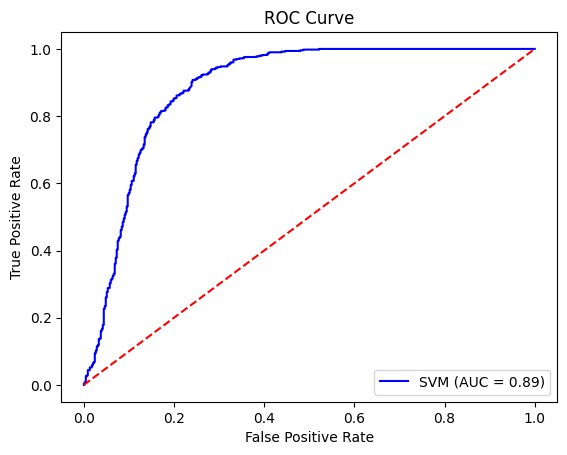

              precision    recall  f1-score   support

      female       0.90      0.73      0.81       452
        male       0.79      0.92      0.85       499

    accuracy                           0.83       951
   macro avg       0.84      0.83      0.83       951
weighted avg       0.84      0.83      0.83       951



In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('voice.csv')

# Step 1: Split the dataset into features (X) and labels (y)
X = data.drop(columns='label')  # Drop the 'label' column as features
y = data['label']  # Target variable

# Step 2: Convert the target variable (label) to numeric (male/female to 0/1)
le = LabelEncoder()
y = le.fit_transform(y)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Feature scaling (important for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply Lasso for feature selection to select top 3 features
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Get the top 3 features based on the largest coefficients (non-zero coefficients)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
top_3_features = lasso_coef.abs().sort_values(ascending=False).head(3).index

print("Top 3 features selected by Lasso: ", top_3_features)

# Step 6: Select the top 3 features from the training and testing sets
X_train_top3 = X_train_scaled[:, lasso_coef.abs().sort_values(ascending=False).head(3).index.get_indexer(X.columns)]
X_test_top3 = X_test_scaled[:, lasso_coef.abs().sort_values(ascending=False).head(3).index.get_indexer(X.columns)]

# Step 7: Apply Support Vector Machine classifier
svm = SVC(probability=True, random_state=42)  # probability=True to enable ROC AUC score calculation
svm.fit(X_train_top3, y_train)

# Step 8: Predict the labels for the test set
y_pred = svm.predict(X_test_top3)
y_pred_proba = svm.predict_proba(X_test_top3)[:, 1]  # Predicted probabilities for ROC AUC

# Step 9: Evaluate the Support Vector Machine model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM on top 3 features: ", accuracy)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score of SVM on top 3 features: ", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score of SVM on top 3 features: ", roc_auc)

# Step 10: ROC Curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))
